In [1]:
import glob
import requests
import pandas as pd
import json

In [2]:
df1 = pd.read_csv('ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv')
df2 = pd.read_csv('ResaleFlatPricesBasedonApprovalDate19901999.csv')
df3 = pd.read_csv('ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv')
df4 = pd.read_csv('ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv')
df5 = pd.read_csv('ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv')
df_final = pd.concat([df1, df2, df3, df4, df5])
df_final.head()


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,2000-01,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,69.0,Improved,1986,147000.0,NaN
1,2000-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,144000.0,NaN
2,2000-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,159000.0,NaN
3,2000-01,ANG MO KIO,3 ROOM,215,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,167000.0,NaN
4,2000-01,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1976,163000.0,NaN


In [3]:
df_final

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,2000-01,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,69.0,Improved,1986,147000.0,NaN
1,2000-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,144000.0,NaN
2,2000-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,159000.0,NaN
3,2000-01,ANG MO KIO,3 ROOM,215,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,167000.0,NaN
4,2000-01,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1976,163000.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
52198,2014-12,YISHUN,5 ROOM,816,YISHUN ST 81,10 TO 12,122.0,Improved,1988,580000.0,NaN
52199,2014-12,YISHUN,EXECUTIVE,325,YISHUN CTRL,10 TO 12,146.0,Maisonette,1988,540000.0,NaN
52200,2014-12,YISHUN,EXECUTIVE,618,YISHUN RING RD,07 TO 09,164.0,Apartment,1992,738000.0,NaN
52201,2014-12,YISHUN,EXECUTIVE,277,YISHUN ST 22,07 TO 09,152.0,Maisonette,1985,592000.0,NaN


In [4]:
df_final

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,2000-01,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,69.0,Improved,1986,147000.0,NaN
1,2000-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,144000.0,NaN
2,2000-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,159000.0,NaN
3,2000-01,ANG MO KIO,3 ROOM,215,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,167000.0,NaN
4,2000-01,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1976,163000.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
52198,2014-12,YISHUN,5 ROOM,816,YISHUN ST 81,10 TO 12,122.0,Improved,1988,580000.0,NaN
52199,2014-12,YISHUN,EXECUTIVE,325,YISHUN CTRL,10 TO 12,146.0,Maisonette,1988,540000.0,NaN
52200,2014-12,YISHUN,EXECUTIVE,618,YISHUN RING RD,07 TO 09,164.0,Apartment,1992,738000.0,NaN
52201,2014-12,YISHUN,EXECUTIVE,277,YISHUN ST 22,07 TO 09,152.0,Maisonette,1985,592000.0,NaN


In [5]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 929324 entries, 0 to 52202
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                929324 non-null  object 
 1   town                 929324 non-null  object 
 2   flat_type            929324 non-null  object 
 3   block                929324 non-null  object 
 4   street_name          929324 non-null  object 
 5   storey_range         929324 non-null  object 
 6   floor_area_sqm       929324 non-null  float64
 7   flat_model           929324 non-null  object 
 8   lease_commence_date  929324 non-null  int64  
 9   resale_price         929324 non-null  float64
 10  remaining_lease      220274 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 85.1+ MB


In [6]:
df_final.shape

(929324, 11)

In [7]:
df_final.isnull().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
dtype: int64

In [8]:
df = df_final.dropna()
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,255000.0,70
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,275000.0,65
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,285000.0,64
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,290000.0,63
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,290000.0,64
...,...,...,...,...,...,...,...,...,...,...,...
183116,2024-07,YISHUN,4 ROOM,719,YISHUN ST 71,07 TO 09,84.0,Simplified,1987,500000.0,62 years 04 months
183117,2024-07,YISHUN,5 ROOM,776,YISHUN AVE 2,07 TO 09,132.0,Improved,1986,698000.0,61 years
183118,2024-07,YISHUN,5 ROOM,508B,YISHUN AVE 4,04 TO 06,113.0,Improved,2018,690000.0,92 years 11 months
183119,2024-07,YISHUN,5 ROOM,674B,YISHUN AVE 4,01 TO 03,112.0,Improved,2018,650000.0,93 years 06 months


In [9]:
df.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
remaining_lease        0
dtype: int64

In [10]:
df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'remaining_lease'],
      dtype='object')

In [11]:
df['flat_type'].unique()

array(['3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE', '1 ROOM',
       'MULTI-GENERATION'], dtype=object)

In [12]:
df['floor_area_sqm'].unique()

array([ 60. ,  68. ,  69. ,  67. ,  74. ,  82. ,  73. ,  75. ,  92. ,
        91. ,  93. ,  97. ,  98. ,  99. , 125. , 121. , 138. , 119. ,
       123. , 110. , 111. ,  45. ,  44. ,  59. ,  65. ,  70. ,  81. ,
        83. ,  84. ,  89. ,  90. , 103. , 107. , 105. ,  85. , 128. ,
       126. , 118. , 122. , 148. , 141. , 173. , 146. , 104. , 109. ,
       108. ,  95. , 100. , 116. , 120. , 137. , 149. , 150. , 174. ,
        64. ,  80. ,  94. , 134. , 113. ,  49. ,  42. ,  56. ,  63. ,
        66. ,  88. , 101. , 115. , 124. , 106. , 102. , 132. , 133. ,
       144. , 130. , 142. ,  77. ,  96. ,  79. , 131. , 147. , 140. ,
        61. ,  60.3,  58. ,  76. , 117. , 139. , 156. ,  87. ,  86. ,
       136. , 129. , 112. ,  71. , 135. , 154. , 127. , 143. , 145. ,
       153. , 114. ,  72. ,  38. ,  57. , 163. , 176. , 177. , 155. ,
        31. ,  53. ,  46. , 152. , 161. , 151. ,  50. , 159. ,  40. ,
       168. , 189. , 164. ,  47. , 157. , 160. ,  52. ,  62. , 280. ,
        78. , 186. ,

In [13]:
df['block'].unique()

array(['174', '541', '163', ..., '240A', '460D', '83A'], dtype=object)

In [14]:
df['block'].count()

220274

In [15]:
df.loc[:,'block'] = df['block'].astype(str)
df.loc[:,'block'] = df['block'].apply(lambda x: ''.join(char for char in x if char in '0123456789'))

In [16]:
df['flat_model'].unique()

array(['Improved', 'New Generation', 'Model A', 'Standard', 'Simplified',
       'Premium Apartment', 'Maisonette', 'Apartment', 'Model A2',
       'Type S1', 'Type S2', 'Adjoined flat', 'Terrace', 'DBSS',
       'Model A-Maisonette', 'Premium Maisonette', 'Multi Generation',
       'Premium Apartment Loft', 'Improved-Maisonette', '2-room', '3Gen'],
      dtype=object)

In [17]:
df['town'].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG',
       'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'PUNGGOL',
       'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'TAMPINES',
       'TOA PAYOH', 'WOODLANDS', 'YISHUN'], dtype=object)

Adding some new columns for more prediction

In [18]:
df['month'].unique()

array(['2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06',
       '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
       '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06',
       '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12',
       '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
       '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06',
       '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12',
       '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06',
       '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12',
       '2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06',
       '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12',
       '2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06',
       '2021-07', '2021-08', '2021-09', '2021-10', 

In [19]:
df.loc[:,'reg_year'] = df['month'].apply(lambda x : int(x.split('-')[0]))
df.loc[:,'reg_month'] = df['month'].apply(lambda x : int(x.split('-')[1]))
df


<ipython-input-19-8e3ea6289bfd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'reg_year'] = df['month'].apply(lambda x : int(x.split('-')[0]))
<ipython-input-19-8e3ea6289bfd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'reg_month'] = df['month'].apply(lambda x : int(x.split('-')[1]))


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,reg_year,reg_month
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,255000.0,70,2015,1
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,275000.0,65,2015,1
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,285000.0,64,2015,1
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,290000.0,63,2015,1
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,290000.0,64,2015,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
183116,2024-07,YISHUN,4 ROOM,719,YISHUN ST 71,07 TO 09,84.0,Simplified,1987,500000.0,62 years 04 months,2024,7
183117,2024-07,YISHUN,5 ROOM,776,YISHUN AVE 2,07 TO 09,132.0,Improved,1986,698000.0,61 years,2024,7
183118,2024-07,YISHUN,5 ROOM,508,YISHUN AVE 4,04 TO 06,113.0,Improved,2018,690000.0,92 years 11 months,2024,7
183119,2024-07,YISHUN,5 ROOM,674,YISHUN AVE 4,01 TO 03,112.0,Improved,2018,650000.0,93 years 06 months,2024,7


In [20]:
df['lease_commence_date'].unique()

array([1986, 1981, 1980, 1979, 1978, 1985, 1976, 1977, 2002, 1993, 1996,
       2006, 2003, 1982, 1974, 2010, 1987, 1984, 2000, 1989, 1995, 1992,
       1988, 1998, 1990, 1983, 2004, 1997, 2005, 1969, 1970, 1971, 1973,
       2009, 1999, 2001, 2008, 2007, 1975, 2011, 1968, 1967, 1972, 1991,
       2012, 1994, 1966, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

In [21]:
df['street_name'].unique()

array(['ANG MO KIO AVE 4', 'ANG MO KIO AVE 10', 'ANG MO KIO AVE 5',
       'ANG MO KIO AVE 8', 'ANG MO KIO AVE 1', 'ANG MO KIO AVE 3',
       'ANG MO KIO AVE 6', 'ANG MO KIO ST 52', 'ANG MO KIO ST 21',
       'ANG MO KIO ST 31', 'BEDOK RESERVOIR RD', 'BEDOK STH RD',
       'BEDOK NTH ST 3', 'BEDOK NTH AVE 1', 'BEDOK NTH RD',
       'NEW UPP CHANGI RD', 'CHAI CHEE ST', 'BEDOK NTH ST 1',
       'BEDOK NTH AVE 4', 'BEDOK NTH ST 2', 'CHAI CHEE AVE',
       'BEDOK NTH AVE 3', 'BEDOK STH AVE 1', 'BEDOK CTRL',
       'BEDOK NTH AVE 2', 'BEDOK STH AVE 2', 'BEDOK RESERVOIR VIEW',
       'CHAI CHEE RD', 'JLN TENAGA', 'BEDOK STH AVE 3', 'LENGKONG TIGA',
       'SHUNFU RD', 'BISHAN ST 24', 'BISHAN ST 12', 'BISHAN ST 22',
       'BISHAN ST 13', 'BISHAN ST 23', 'BRIGHT HILL DR', 'SIN MING AVE',
       'BT BATOK ST 52', 'BT BATOK WEST AVE 4', 'BT BATOK WEST AVE 2',
       'BT BATOK EAST AVE 4', 'BT BATOK EAST AVE 3', 'BT BATOK ST 21',
       'BT BATOK EAST AVE 5', 'BT BATOK WEST AVE 8', 'BT BATOK ST 

          flat_type  flat_model
0            1 ROOM           1
1            2 ROOM           6
2            3 ROOM           8
3            4 ROOM          12
4            5 ROOM          11
5         EXECUTIVE           5
6  MULTI-GENERATION           1


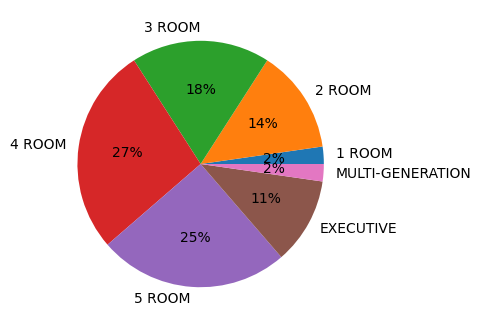

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

temp = pd.DataFrame(df.groupby('flat_type')['flat_model'].nunique()).reset_index()
print(temp)
plt.figure(figsize = (5,4))
plt.pie(temp['flat_model'], labels = temp['flat_type'], autopct = '%.0f%%')
plt.show()

<Axes: title={'center': 'floor area distribution of flat type'}, xlabel='flat_type', ylabel='floor_area_sqm'>

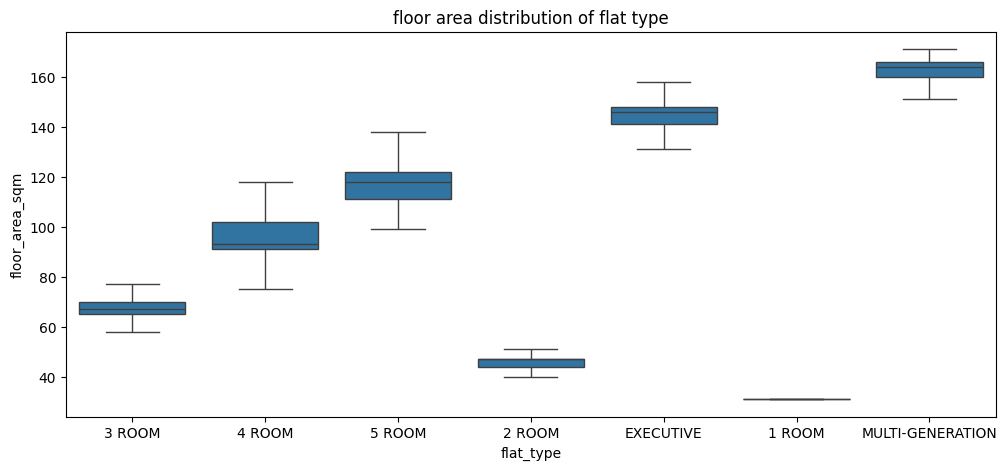

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,5))
plt.title('floor area distribution of flat type')
sns.boxplot(x = 'flat_type', y ='floor_area_sqm', data = df, showfliers = False)

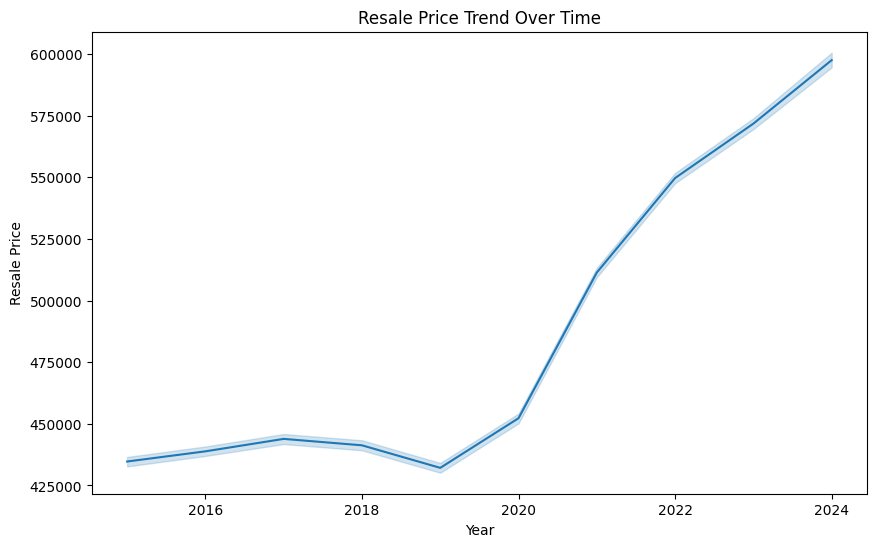

In [24]:
df.loc[:,'lease_commence_date'] = df['lease_commence_date']

plt.figure(figsize=(10, 6))
sns.lineplot(x='reg_year', y='resale_price', data=df)
plt.title('Resale Price Trend Over Time')
plt.xlabel('Year')
plt.ylabel('Resale Price')
plt.show()

In [25]:
df['address'] = df['block'] + ' ' + df['street_name']
df

<ipython-input-25-222b92edb9dd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['address'] = df['block'] + ' ' + df['street_name']


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,reg_year,reg_month,address
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,255000.0,70,2015,1,174 ANG MO KIO AVE 4
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,275000.0,65,2015,1,541 ANG MO KIO AVE 10
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,285000.0,64,2015,1,163 ANG MO KIO AVE 4
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,290000.0,63,2015,1,446 ANG MO KIO AVE 10
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,290000.0,64,2015,1,557 ANG MO KIO AVE 10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183116,2024-07,YISHUN,4 ROOM,719,YISHUN ST 71,07 TO 09,84.0,Simplified,1987,500000.0,62 years 04 months,2024,7,719 YISHUN ST 71
183117,2024-07,YISHUN,5 ROOM,776,YISHUN AVE 2,07 TO 09,132.0,Improved,1986,698000.0,61 years,2024,7,776 YISHUN AVE 2
183118,2024-07,YISHUN,5 ROOM,508,YISHUN AVE 4,04 TO 06,113.0,Improved,2018,690000.0,92 years 11 months,2024,7,508 YISHUN AVE 4
183119,2024-07,YISHUN,5 ROOM,674,YISHUN AVE 4,01 TO 03,112.0,Improved,2018,650000.0,93 years 06 months,2024,7,674 YISHUN AVE 4


In [26]:
address_list = df['address'].unique()
address_list

array(['174 ANG MO KIO AVE 4', '541 ANG MO KIO AVE 10',
       '163 ANG MO KIO AVE 4', ..., '118 CANBERRA CRES',
       '455 SENGKANG WEST AVE', '185 TOA PAYOH CTRL'], dtype=object)

In [27]:
df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'remaining_lease', 'reg_year', 'reg_month', 'address'],
      dtype='object')

Adding some features

In [28]:
df['remaining_lease'] = df['remaining_lease'].astype(str)

def extract_years(lease_str):
    # Split the string to get the number of years
    years = lease_str.split(' ')[0]
    return int(years)

# Apply the function to the 'remaining_lease' column
df['remaining_lease'] = df['remaining_lease'].apply(extract_years)


<ipython-input-28-867b98ef4075>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['remaining_lease'] = df['remaining_lease'].astype(str)
<ipython-input-28-867b98ef4075>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['remaining_lease'] = df['remaining_lease'].apply(extract_years)


In [29]:
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,reg_year,reg_month,address
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,255000.0,70,2015,1,174 ANG MO KIO AVE 4
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,275000.0,65,2015,1,541 ANG MO KIO AVE 10
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,285000.0,64,2015,1,163 ANG MO KIO AVE 4
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,290000.0,63,2015,1,446 ANG MO KIO AVE 10
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,290000.0,64,2015,1,557 ANG MO KIO AVE 10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183116,2024-07,YISHUN,4 ROOM,719,YISHUN ST 71,07 TO 09,84.0,Simplified,1987,500000.0,62,2024,7,719 YISHUN ST 71
183117,2024-07,YISHUN,5 ROOM,776,YISHUN AVE 2,07 TO 09,132.0,Improved,1986,698000.0,61,2024,7,776 YISHUN AVE 2
183118,2024-07,YISHUN,5 ROOM,508,YISHUN AVE 4,04 TO 06,113.0,Improved,2018,690000.0,92,2024,7,508 YISHUN AVE 4
183119,2024-07,YISHUN,5 ROOM,674,YISHUN AVE 4,01 TO 03,112.0,Improved,2018,650000.0,93,2024,7,674 YISHUN AVE 4


In [30]:
import datetime

df['price_per_sqm'] = df['resale_price'] / df['floor_area_sqm']
df['years_holding'] = df['reg_year'] / df['lease_commence_date']
df['current_remaining_lease'] = df['remaining_lease'] - (2024 - df['reg_year'])

df['age_of_property'] = datetime.datetime.now().year - df['lease_commence_date']
df

<ipython-input-30-856275b0d9d5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_per_sqm'] = df['resale_price'] / df['floor_area_sqm']
<ipython-input-30-856275b0d9d5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['years_holding'] = df['reg_year'] / df['lease_commence_date']
<ipython-input-30-856275b0d9d5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,reg_year,reg_month,address,price_per_sqm,years_holding,current_remaining_lease,age_of_property
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,255000.0,70,2015,1,174 ANG MO KIO AVE 4,4250.000000,1.014602,61,38
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,275000.0,65,2015,1,541 ANG MO KIO AVE 10,4044.117647,1.017163,56,43
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,285000.0,64,2015,1,163 ANG MO KIO AVE 4,4130.434783,1.017677,55,44
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,290000.0,63,2015,1,446 ANG MO KIO AVE 10,4264.705882,1.018191,54,45
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,290000.0,64,2015,1,557 ANG MO KIO AVE 10,4264.705882,1.017677,55,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183116,2024-07,YISHUN,4 ROOM,719,YISHUN ST 71,07 TO 09,84.0,Simplified,1987,500000.0,62,2024,7,719 YISHUN ST 71,5952.380952,1.018621,62,37
183117,2024-07,YISHUN,5 ROOM,776,YISHUN AVE 2,07 TO 09,132.0,Improved,1986,698000.0,61,2024,7,776 YISHUN AVE 2,5287.878788,1.019134,61,38
183118,2024-07,YISHUN,5 ROOM,508,YISHUN AVE 4,04 TO 06,113.0,Improved,2018,690000.0,92,2024,7,508 YISHUN AVE 4,6106.194690,1.002973,92,6
183119,2024-07,YISHUN,5 ROOM,674,YISHUN AVE 4,01 TO 03,112.0,Improved,2018,650000.0,93,2024,7,674 YISHUN AVE 4,5803.571429,1.002973,93,6


In [31]:
df.isnull().sum()

month                      0
town                       0
flat_type                  0
block                      0
street_name                0
storey_range               0
floor_area_sqm             0
flat_model                 0
lease_commence_date        0
resale_price               0
remaining_lease            0
reg_year                   0
reg_month                  0
address                    0
price_per_sqm              0
years_holding              0
current_remaining_lease    0
age_of_property            0
dtype: int64

In [32]:
df['storey_range'].unique()

array(['07 TO 09', '01 TO 03', '13 TO 15', '10 TO 12', '04 TO 06',
       '19 TO 21', '16 TO 18', '22 TO 24', '25 TO 27', '28 TO 30',
       '34 TO 36', '46 TO 48', '31 TO 33', '37 TO 39', '43 TO 45',
       '40 TO 42', '49 TO 51'], dtype=object)

EDA

In [33]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
floor_area_sqm,220274.0,97.114244,24.057650,31.000000,81.000000,93.000000,112.000000,2.800000e+02
lease_commence_date,220274.0,1995.174919,13.705727,1966.000000,1985.000000,1995.000000,2005.000000,2.020000e+03
resale_price,220274.0,488602.813576,169203.513281,140000.000000,365000.000000,455000.000000,580000.000000,1.588000e+06
remaining_lease,220274.0,74.093497,13.500253,41.000000,63.000000,74.000000,85.000000,9.700000e+01
reg_year,220274.0,2019.647911,2.704752,2015.000000,2017.000000,2020.000000,2022.000000,2.024000e+03
reg_month,220274.0,6.493326,3.389941,1.000000,4.000000,6.000000,9.000000,1.200000e+01
price_per_sqm,220274.0,5081.056026,1413.874142,2089.552239,4094.594595,4780.701754,5698.497059,1.559140e+04
years_holding,220274.0,1.012312,0.006831,1.000495,1.006490,1.012519,1.017677,1.029502e+00
current_remaining_lease,220274.0,69.741408,13.749024,40.000000,59.000000,70.000000,79.000000,9.500000e+01
age_of_property,220274.0,28.825081,13.705727,4.000000,19.000000,29.000000,39.000000,5.800000e+01


In [34]:
# Unique values in each column
for col in df.columns[0:]:
    print(col, ': ', (df[col].nunique()), 'labels')

month :  115 labels
town :  26 labels
flat_type :  7 labels
block :  986 labels
street_name :  566 labels
storey_range :  17 labels
floor_area_sqm :  174 labels
flat_model :  21 labels
lease_commence_date :  55 labels
resale_price :  4197 labels
remaining_lease :  57 labels
reg_year :  10 labels
reg_month :  12 labels
address :  7906 labels
price_per_sqm :  31443 labels
years_holding :  519 labels
current_remaining_lease :  56 labels
age_of_property :  55 labels


SKEWNESS

In [35]:
# Skewness for 'resale_price'
skewness_resale_price = df['resale_price'].skew()
print("Skewness of 'resale_price':", skewness_resale_price)

Skewness of 'resale_price': 1.0127373044796977


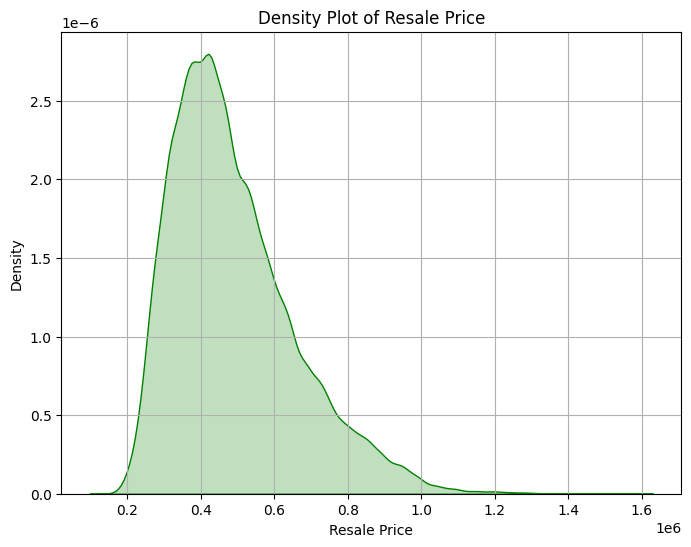

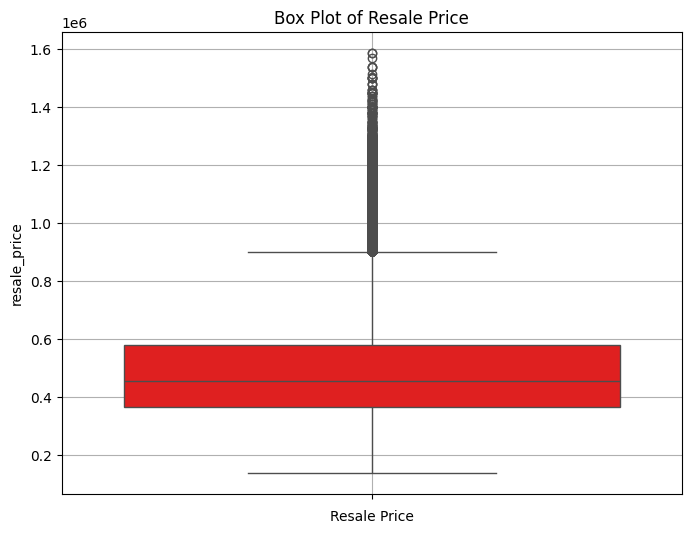

In [36]:
# Plot density & box plot for 'resale_price'

plt.figure(figsize=(8, 6))
sns.kdeplot(df['resale_price'], color='green', fill=True)
plt.title('Density Plot of Resale Price')
plt.xlabel('Resale Price')
plt.ylabel('Density')
plt.grid(True)
plt.show()


plt.figure(figsize=(8, 6))
sns.boxplot(df['resale_price'], color='red')
plt.title('Box Plot of Resale Price')
plt.xlabel('Resale Price')
plt.grid(True)
plt.show()

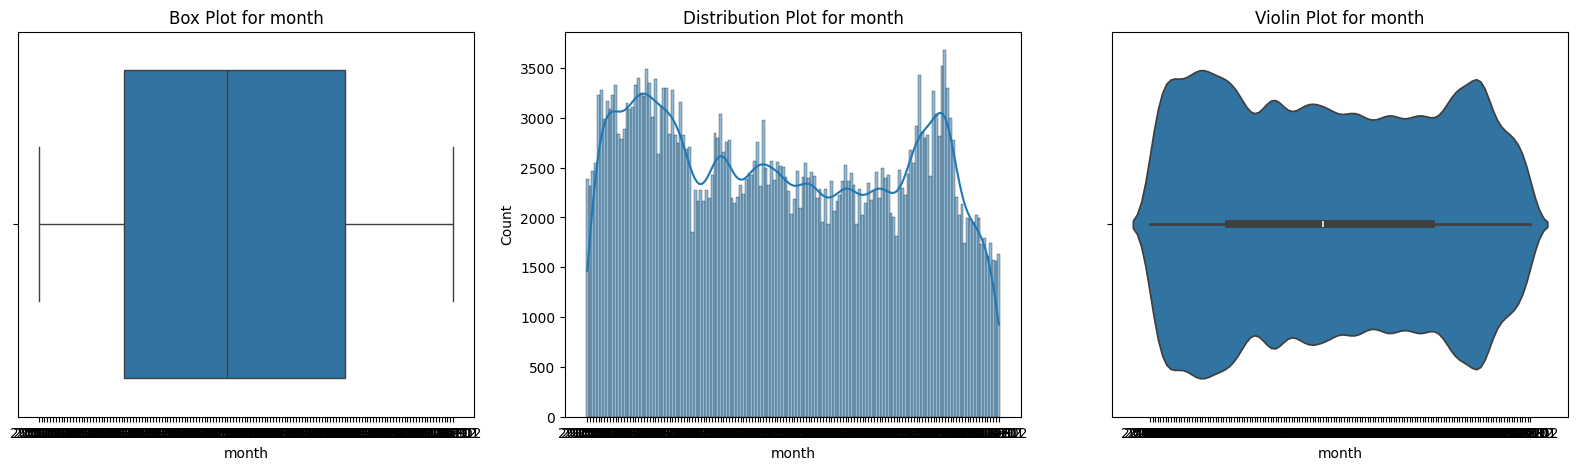

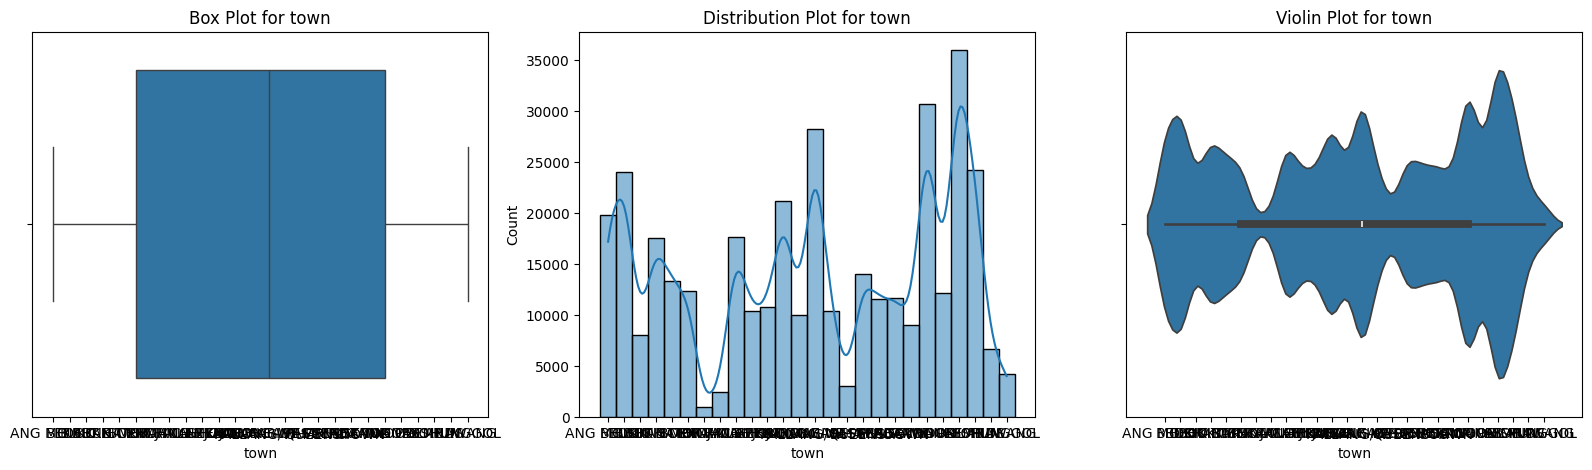

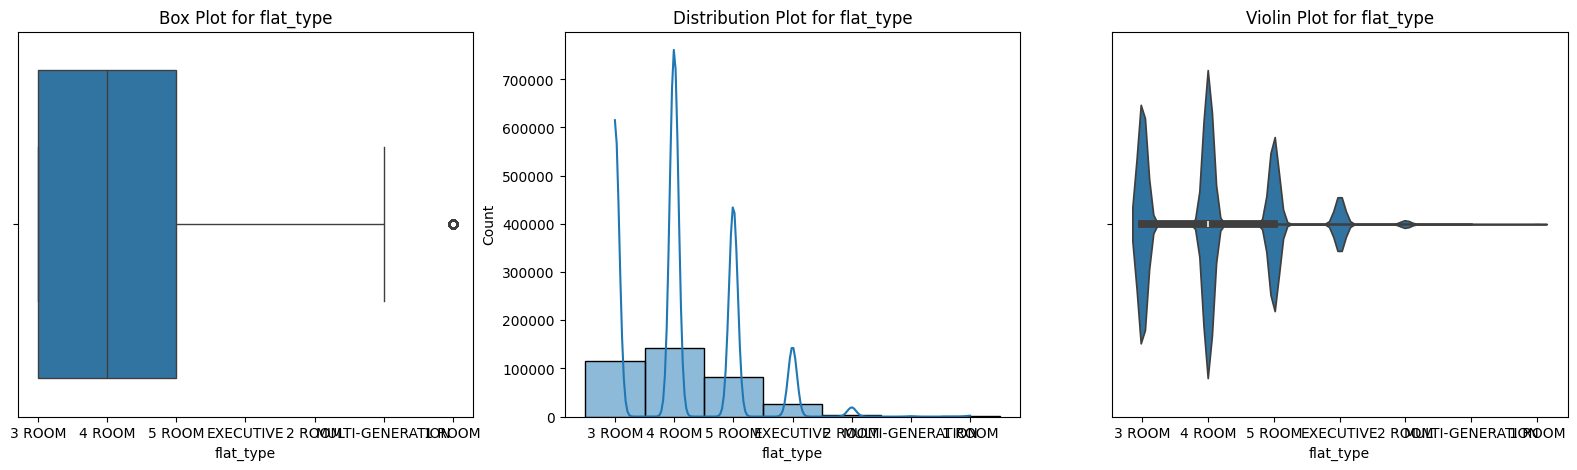

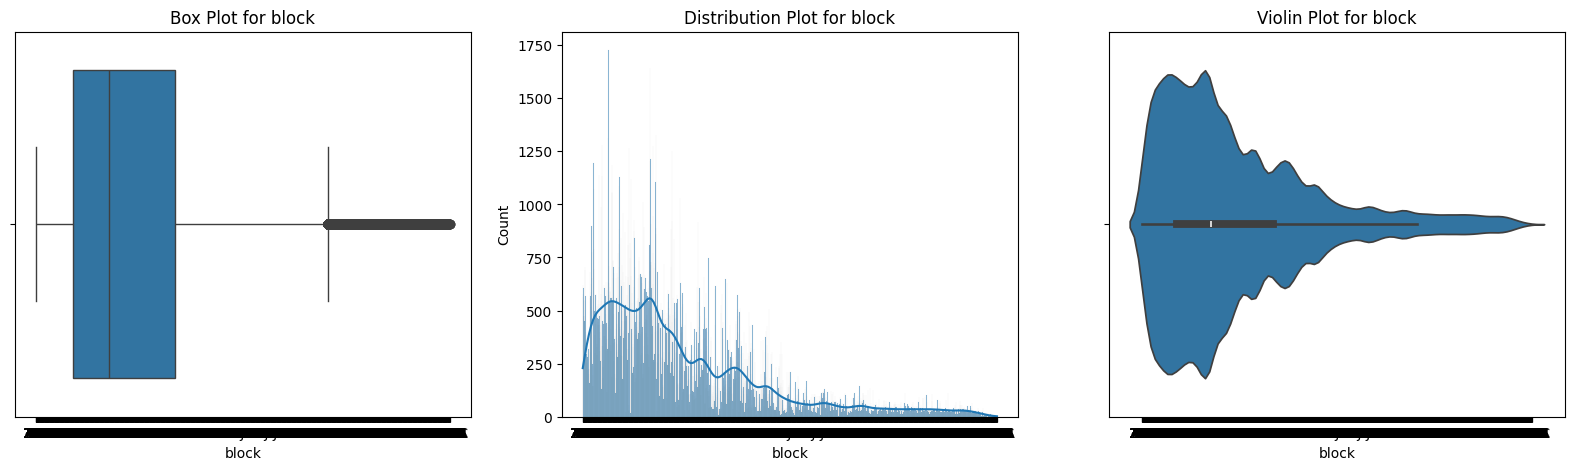

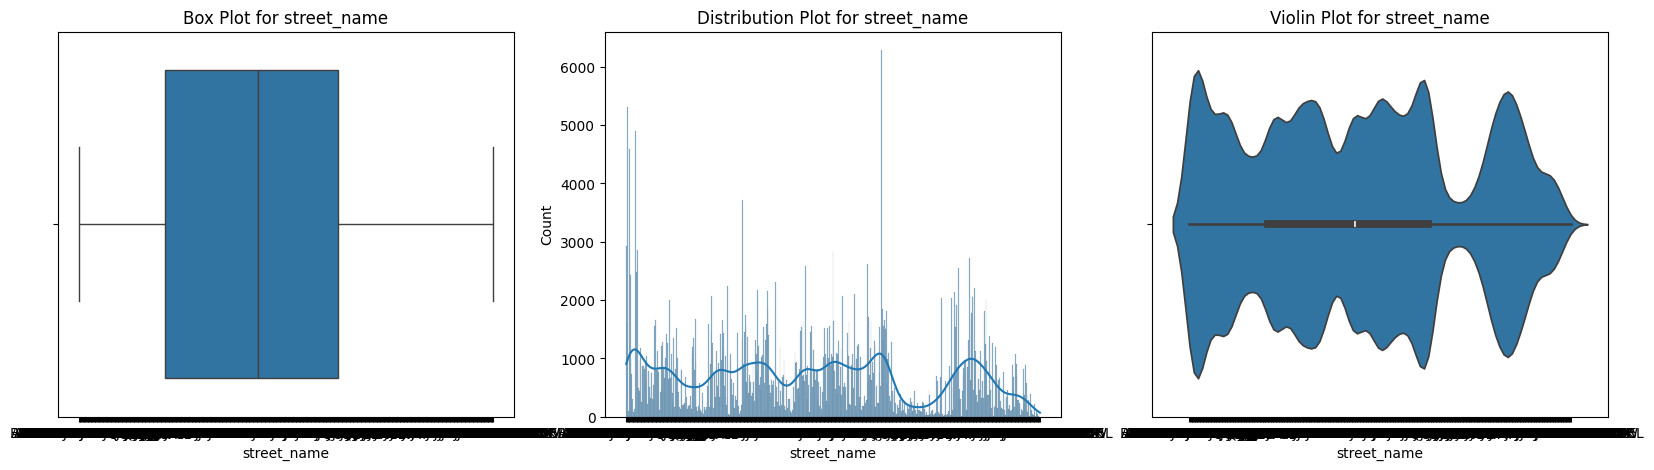

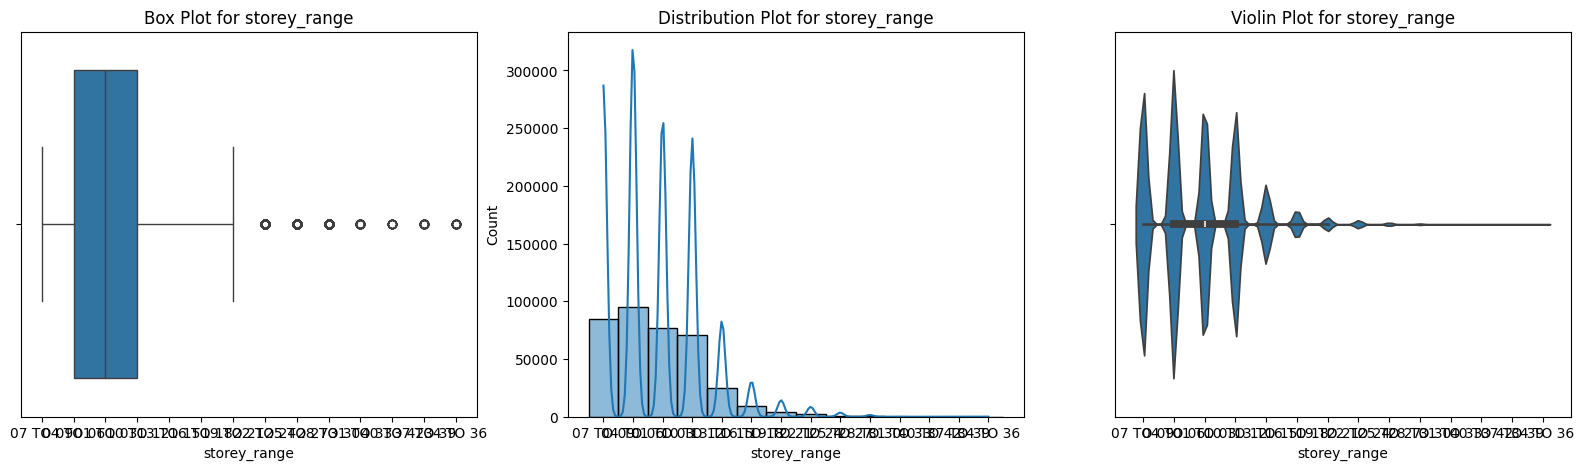

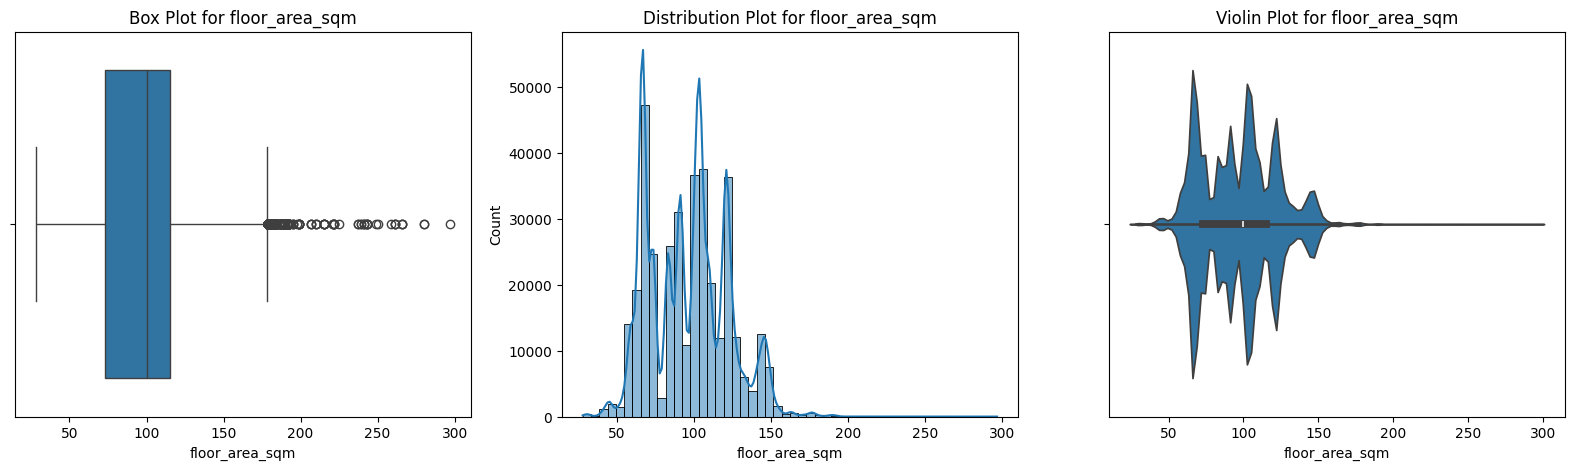

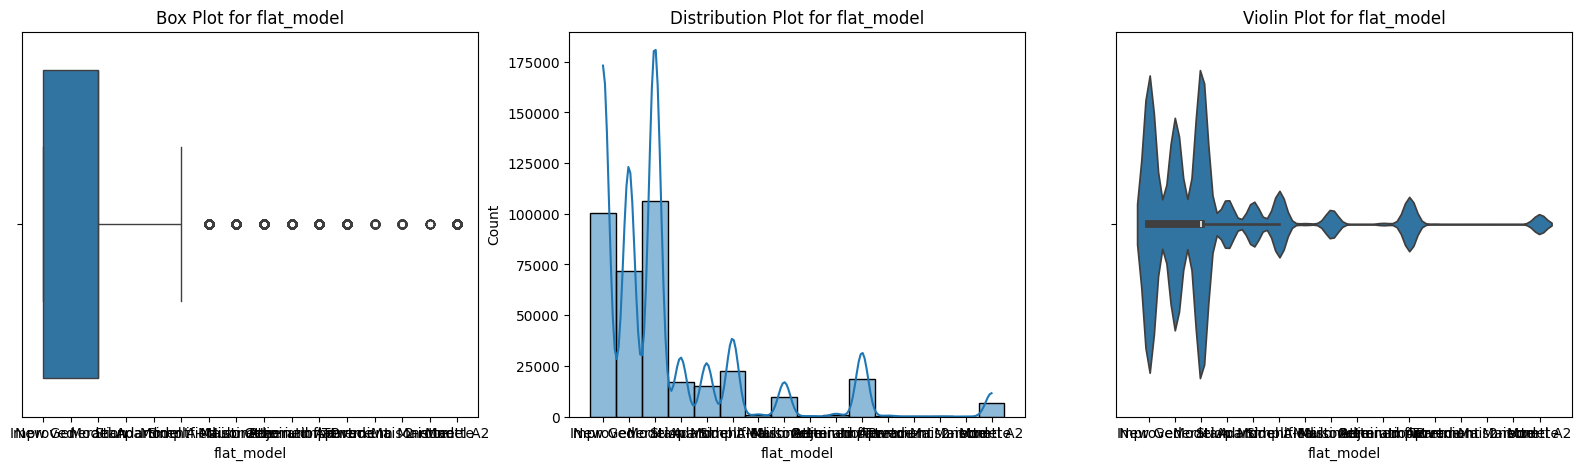

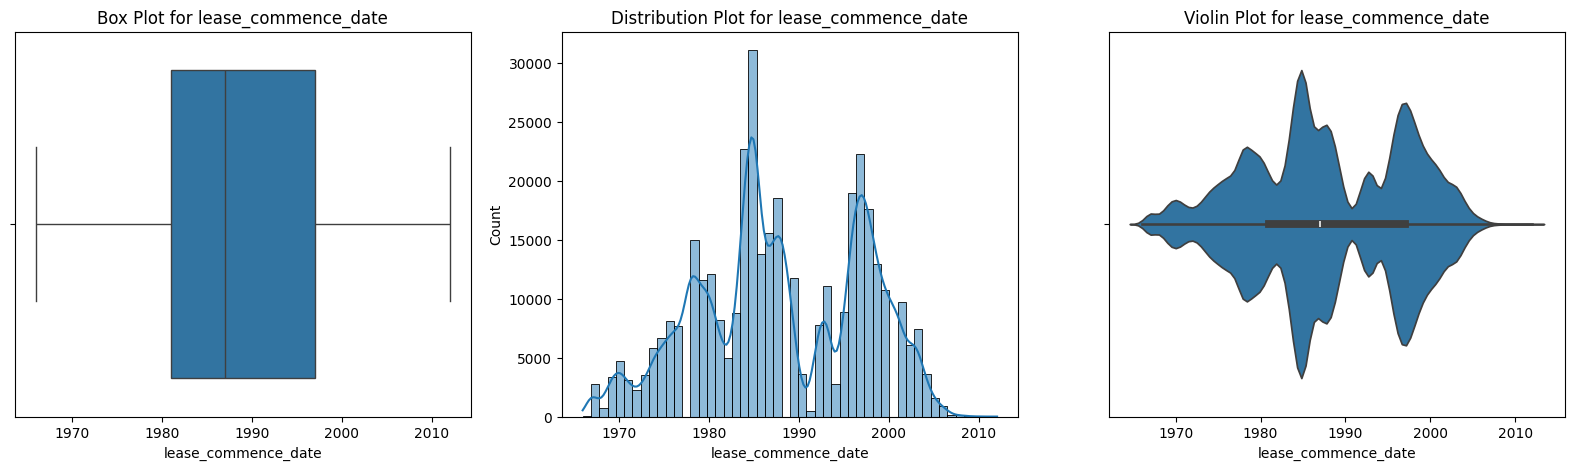

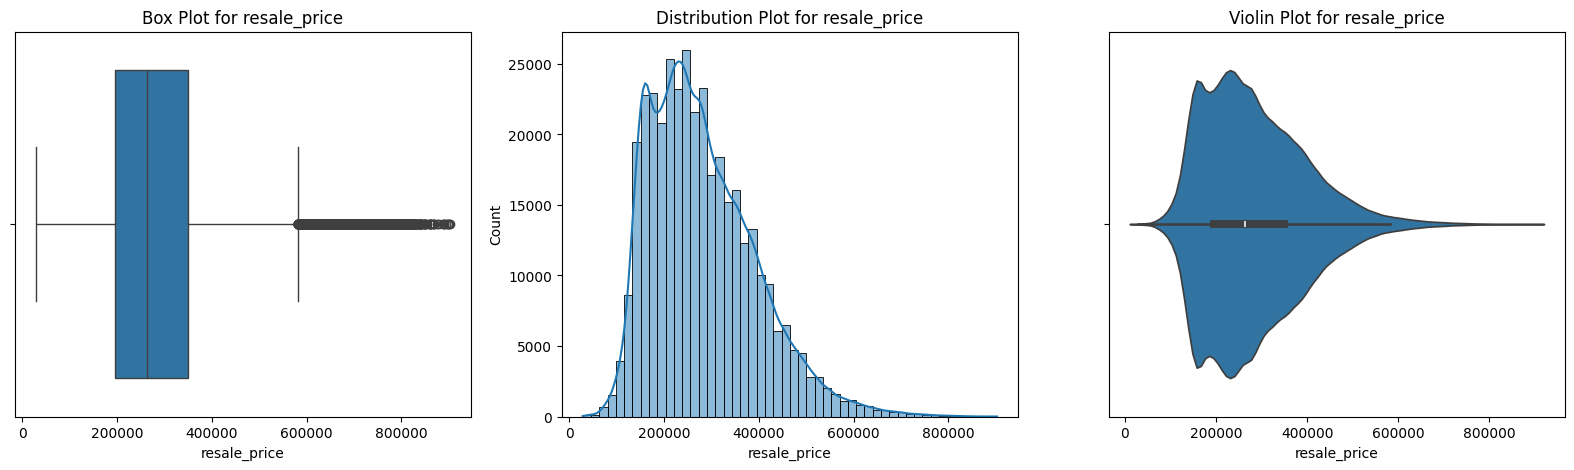

In [37]:
def plot(df, column):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.boxplot(data=df, x=column)
    plt.title(f'Box Plot for {column}')

    plt.subplot(1,3,2)
    sns.histplot(data=df, x=column, kde=True, bins=50)
    plt.title(f'Distribution Plot for {column}')

    plt.subplot(1,3,3)
    sns.violinplot(data=df, x=column)
    plt.title(f'Violin Plot for {column}')
    plt.show()

for i in df1:
    plot(df1, i)

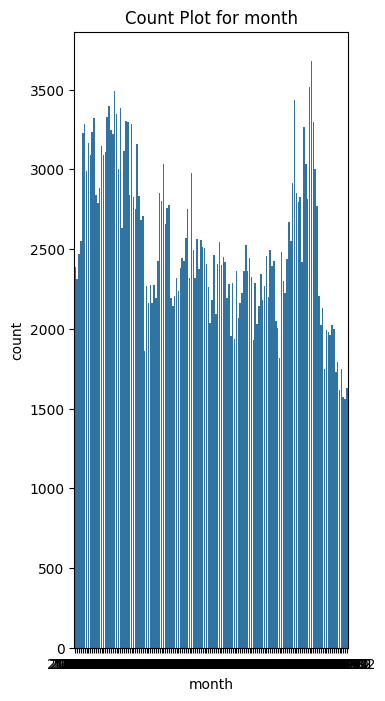

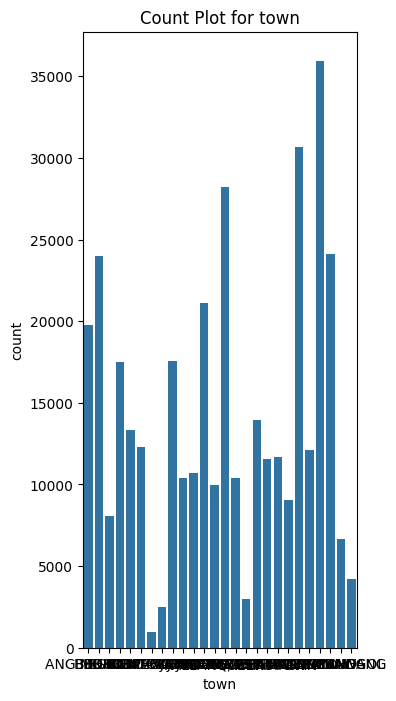

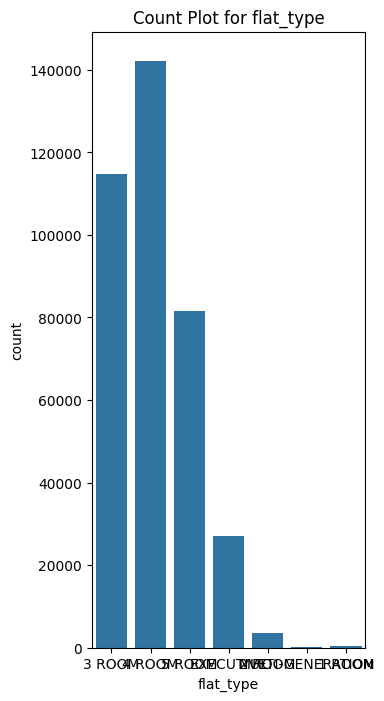

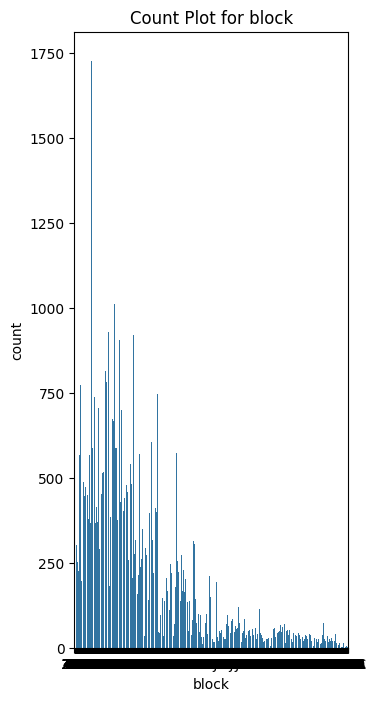

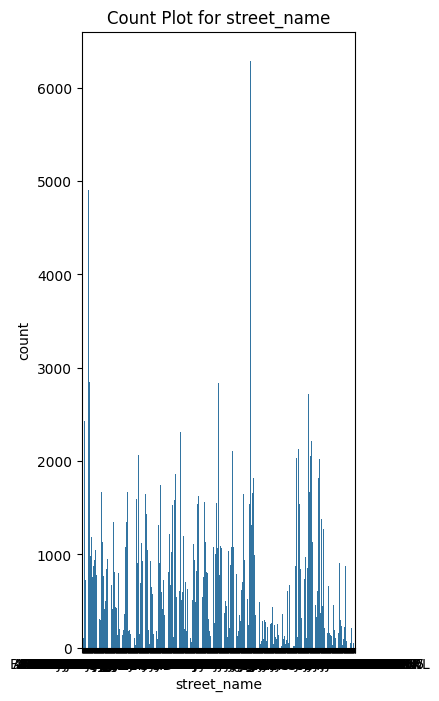

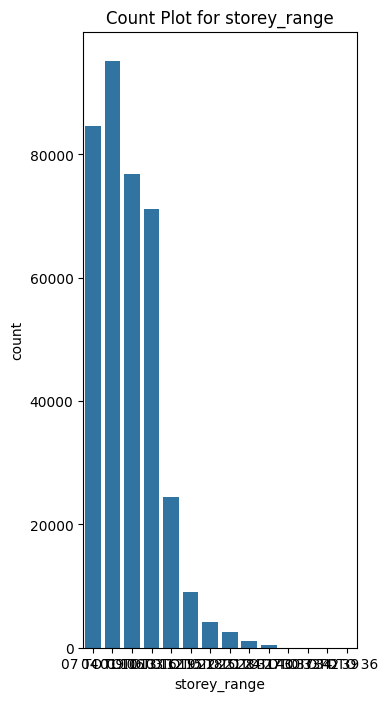

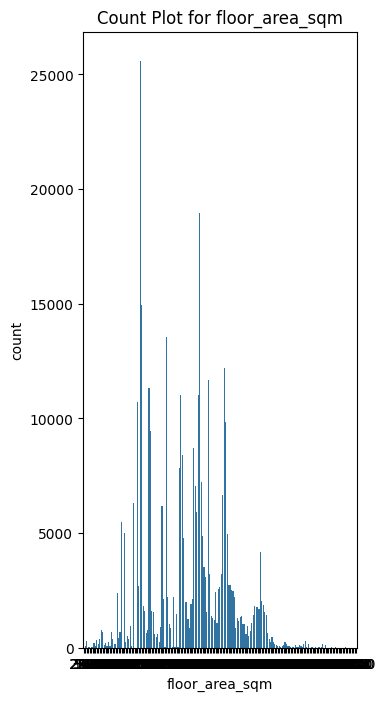

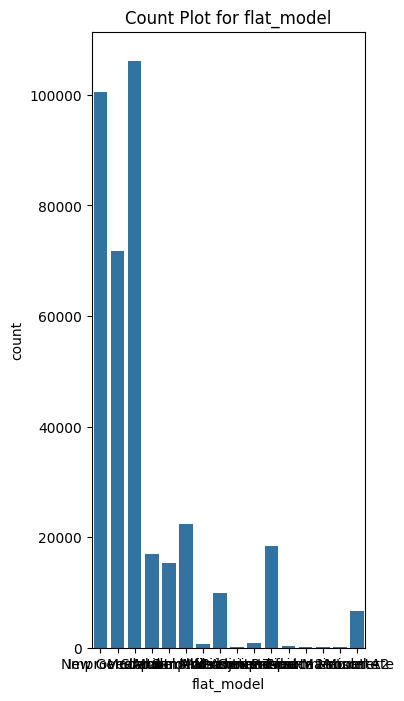

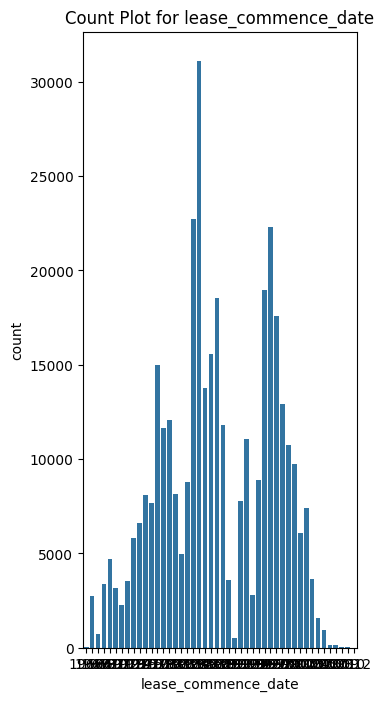

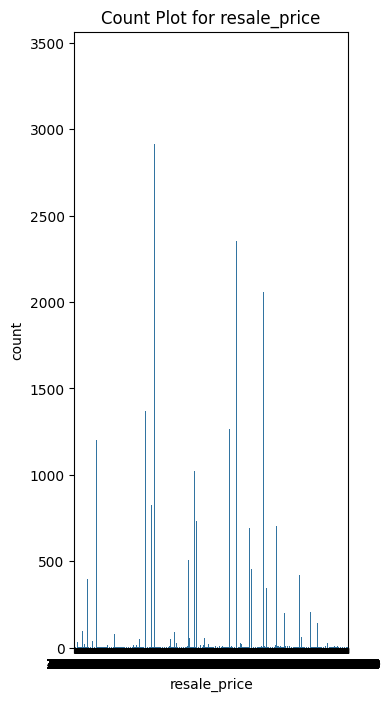

In [38]:
def plot(df, column):
    plt.figure(figsize=(12,8))
    plt.subplot(1,3,1)
    sns.countplot(data=df, x=column)
    plt.title(f'Count Plot for {column}')


for i in df1:
    plot(df1, i)

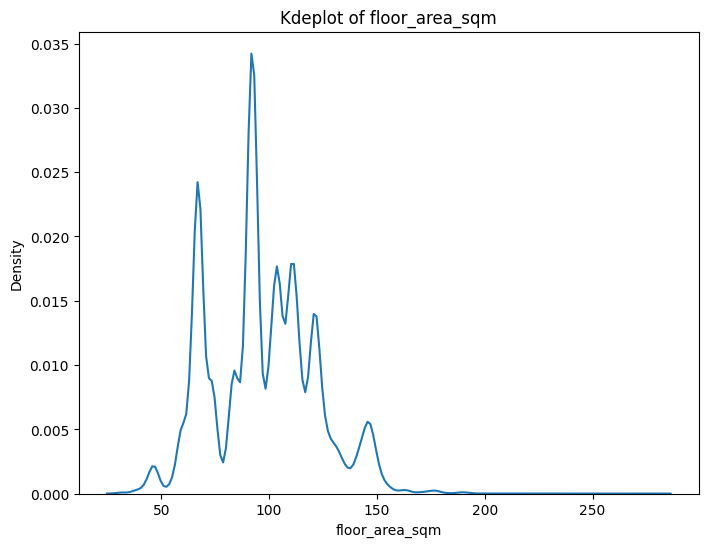

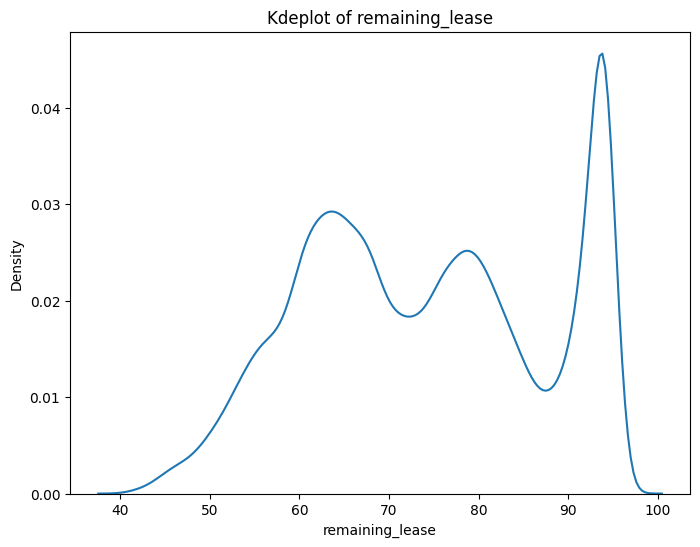

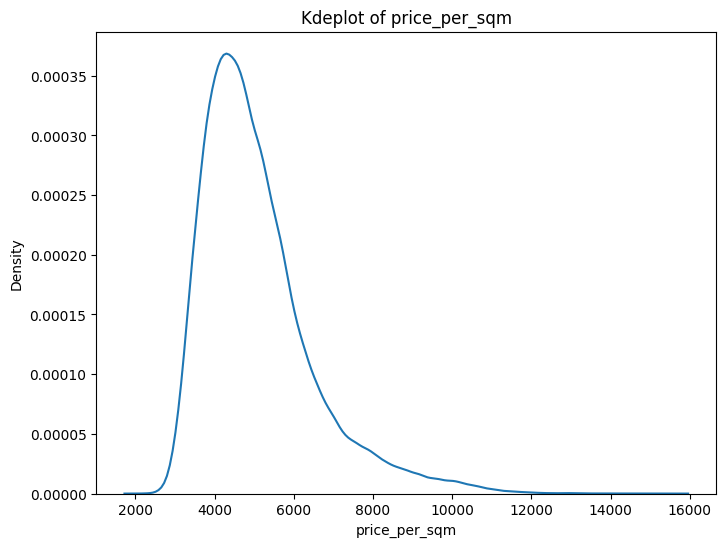

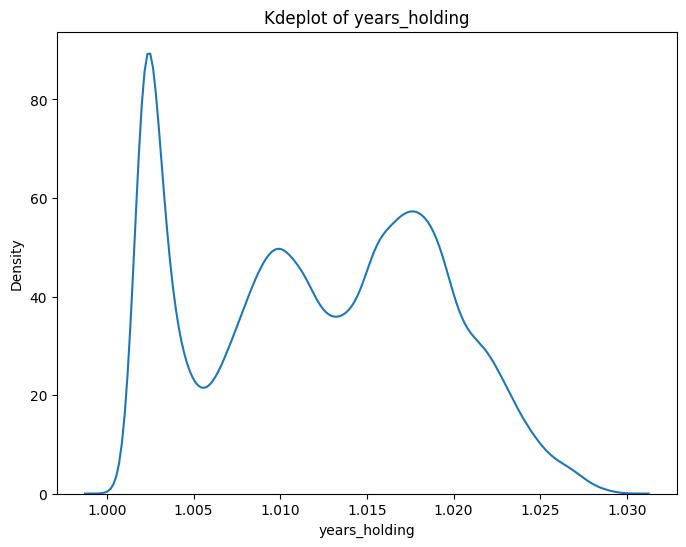

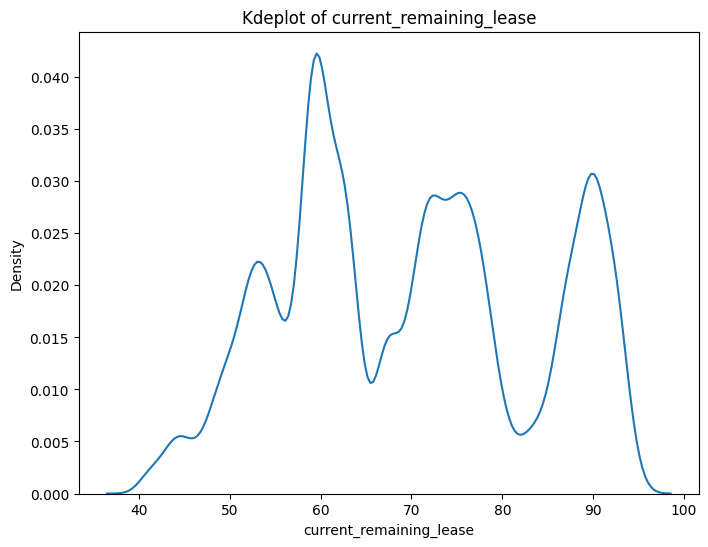

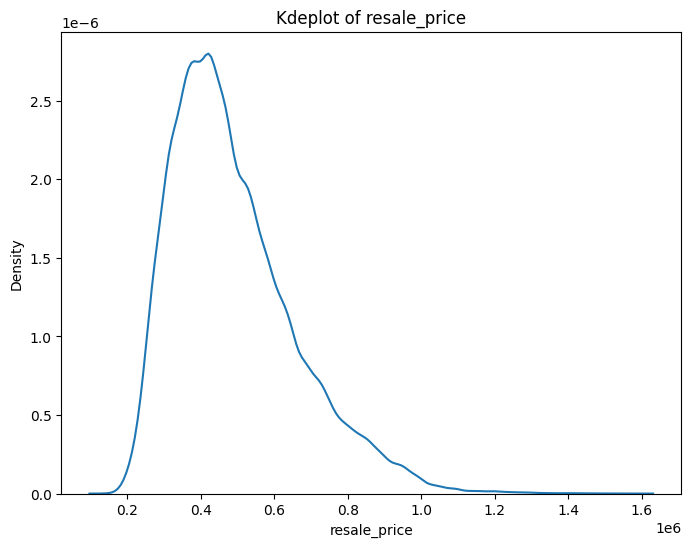

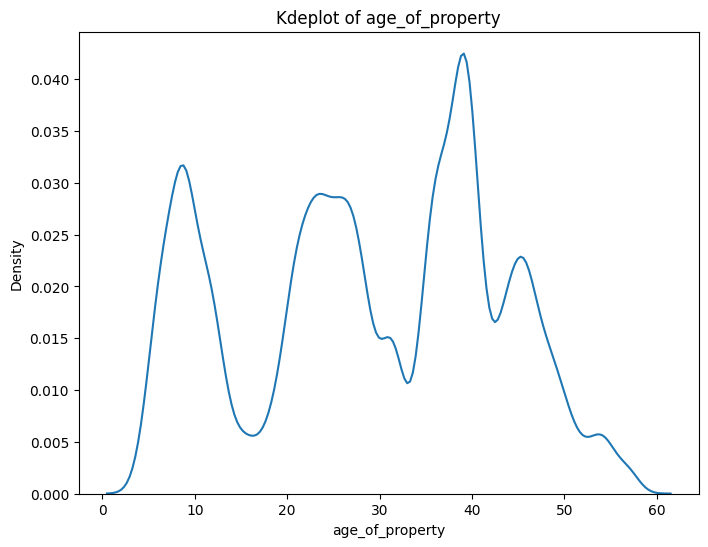

In [39]:
# List of columns(continuous variables) for finding skewness
col = ['floor_area_sqm','remaining_lease','price_per_sqm','years_holding','current_remaining_lease',
       'resale_price','age_of_property']

for i in col:
    plt.figure(figsize=(8, 6))
    sns.kdeplot(data=df, x=i)
    plt.title(f'Kdeplot of {i}')
    plt.xlabel(i)
    plt.show()

In [40]:
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,reg_year,reg_month,address,price_per_sqm,years_holding,current_remaining_lease,age_of_property
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,255000.0,70,2015,1,174 ANG MO KIO AVE 4,4250.000000,1.014602,61,38
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,275000.0,65,2015,1,541 ANG MO KIO AVE 10,4044.117647,1.017163,56,43
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,285000.0,64,2015,1,163 ANG MO KIO AVE 4,4130.434783,1.017677,55,44
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,290000.0,63,2015,1,446 ANG MO KIO AVE 10,4264.705882,1.018191,54,45
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,290000.0,64,2015,1,557 ANG MO KIO AVE 10,4264.705882,1.017677,55,44


In [41]:
#Use LabelEncoding for the needed columns

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['flat_type'] = label_encoder.fit_transform(df['flat_type'])
df['flat_type'] = df['flat_type'].astype(float)

unique_labels = label_encoder.classes_
encoded_values = label_encoder.transform(unique_labels)
print({'original': unique_labels,'encoded':encoded_values})

{'original': array(['1 ROOM', '2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE',
       'MULTI-GENERATION'], dtype=object), 'encoded': array([0, 1, 2, 3, 4, 5, 6])}


<ipython-input-41-dbf734fc9ff6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['flat_type'] = label_encoder.fit_transform(df['flat_type'])
<ipython-input-41-dbf734fc9ff6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['flat_type'] = df['flat_type'].astype(float)


In [42]:
label_encoder = LabelEncoder()
df['flat_model'] = label_encoder.fit_transform(df['flat_model'])
df['flat_model'] = df['flat_model'].astype(float)

unique_labels = label_encoder.classes_
encoded_values = label_encoder.transform(unique_labels)
print({'original': unique_labels,'encoded':encoded_values})

{'original': array(['2-room', '3Gen', 'Adjoined flat', 'Apartment', 'DBSS', 'Improved',
       'Improved-Maisonette', 'Maisonette', 'Model A',
       'Model A-Maisonette', 'Model A2', 'Multi Generation',
       'New Generation', 'Premium Apartment', 'Premium Apartment Loft',
       'Premium Maisonette', 'Simplified', 'Standard', 'Terrace',
       'Type S1', 'Type S2'], dtype=object), 'encoded': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])}


<ipython-input-42-7a699a8964ff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['flat_model'] = label_encoder.fit_transform(df['flat_model'])
<ipython-input-42-7a699a8964ff>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['flat_model'] = df['flat_model'].astype(float)


In [43]:
label_encoder = LabelEncoder()
df['town'] = label_encoder.fit_transform(df['town'])
df['town'] = df['town'].astype(float)

unique_labels = label_encoder.classes_
encoded_values = label_encoder.transform(unique_labels)
print({'original': unique_labels,'encoded':encoded_values})

{'original': array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG',
       'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'PUNGGOL',
       'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'TAMPINES',
       'TOA PAYOH', 'WOODLANDS', 'YISHUN'], dtype=object), 'encoded': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25])}


<ipython-input-43-be0c30175233>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['town'] = label_encoder.fit_transform(df['town'])
<ipython-input-43-be0c30175233>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['town'] = df['town'].astype(float)


In [44]:
label_encoder = LabelEncoder()
df['storey_range'] = label_encoder.fit_transform(df['storey_range'])
df['storey_range'] = df['storey_range'].astype(float)

unique_labels = label_encoder.classes_
encoded_values = label_encoder.transform(unique_labels)
print({'original': unique_labels,'encoded':encoded_values})

{'original': array(['01 TO 03', '04 TO 06', '07 TO 09', '10 TO 12', '13 TO 15',
       '16 TO 18', '19 TO 21', '22 TO 24', '25 TO 27', '28 TO 30',
       '31 TO 33', '34 TO 36', '37 TO 39', '40 TO 42', '43 TO 45',
       '46 TO 48', '49 TO 51'], dtype=object), 'encoded': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])}


<ipython-input-44-190d19ff4a8b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['storey_range'] = label_encoder.fit_transform(df['storey_range'])
<ipython-input-44-190d19ff4a8b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['storey_range'] = df['storey_range'].astype(float)


In [45]:
label_encoder = LabelEncoder()
df['street_name'] = label_encoder.fit_transform(df['street_name'])
df['street_name'] = df['street_name'].astype(float)

unique_labels = label_encoder.classes_
encoded_values = label_encoder.transform(unique_labels)
print({'original': unique_labels,'encoded':encoded_values})

{'original': array(['ADMIRALTY DR', 'ADMIRALTY LINK', 'AH HOOD RD', 'ALJUNIED AVE 2',
       'ALJUNIED CRES', 'ALJUNIED RD', 'ANCHORVALE CRES', 'ANCHORVALE DR',
       'ANCHORVALE LANE', 'ANCHORVALE LINK', 'ANCHORVALE RD',
       'ANCHORVALE ST', 'ANG MO KIO AVE 1', 'ANG MO KIO AVE 10',
       'ANG MO KIO AVE 2', 'ANG MO KIO AVE 3', 'ANG MO KIO AVE 4',
       'ANG MO KIO AVE 5', 'ANG MO KIO AVE 6', 'ANG MO KIO AVE 8',
       'ANG MO KIO AVE 9', 'ANG MO KIO ST 11', 'ANG MO KIO ST 21',
       'ANG MO KIO ST 31', 'ANG MO KIO ST 32', 'ANG MO KIO ST 44',
       'ANG MO KIO ST 51', 'ANG MO KIO ST 52', 'ANG MO KIO ST 61',
       'BAIN ST', 'BALAM RD', 'BANGKIT RD', 'BEACH RD', 'BEDOK CTRL',
       'BEDOK NTH AVE 1', 'BEDOK NTH AVE 2', 'BEDOK NTH AVE 3',
       'BEDOK NTH AVE 4', 'BEDOK NTH RD', 'BEDOK NTH ST 1',
       'BEDOK NTH ST 2', 'BEDOK NTH ST 3', 'BEDOK NTH ST 4',
       'BEDOK RESERVOIR CRES', 'BEDOK RESERVOIR RD',
       'BEDOK RESERVOIR VIEW', 'BEDOK STH AVE 1', 'BEDOK STH AVE 2',


<ipython-input-45-1031ff94aabf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['street_name'] = label_encoder.fit_transform(df['street_name'])
<ipython-input-45-1031ff94aabf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['street_name'] = df['street_name'].astype(float)


In [46]:
df.drop(['month'], axis=1, inplace=True)

<ipython-input-46-0ae0acc60bb9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['month'], axis=1, inplace=True)


In [47]:
df

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,reg_year,reg_month,address,price_per_sqm,years_holding,current_remaining_lease,age_of_property
0,0.0,2.0,174,16.0,2.0,60.0,5.0,1986,255000.0,70,2015,1,174 ANG MO KIO AVE 4,4250.000000,1.014602,61,38
1,0.0,2.0,541,13.0,0.0,68.0,12.0,1981,275000.0,65,2015,1,541 ANG MO KIO AVE 10,4044.117647,1.017163,56,43
2,0.0,2.0,163,16.0,0.0,69.0,12.0,1980,285000.0,64,2015,1,163 ANG MO KIO AVE 4,4130.434783,1.017677,55,44
3,0.0,2.0,446,13.0,0.0,68.0,12.0,1979,290000.0,63,2015,1,446 ANG MO KIO AVE 10,4264.705882,1.018191,54,45
4,0.0,2.0,557,13.0,2.0,68.0,12.0,1980,290000.0,64,2015,1,557 ANG MO KIO AVE 10,4264.705882,1.017677,55,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183116,25.0,3.0,719,555.0,2.0,84.0,16.0,1987,500000.0,62,2024,7,719 YISHUN ST 71,5952.380952,1.018621,62,37
183117,25.0,4.0,776,536.0,2.0,132.0,5.0,1986,698000.0,61,2024,7,776 YISHUN AVE 2,5287.878788,1.019134,61,38
183118,25.0,4.0,508,538.0,1.0,113.0,5.0,2018,690000.0,92,2024,7,508 YISHUN AVE 4,6106.194690,1.002973,92,6
183119,25.0,4.0,674,538.0,0.0,112.0,5.0,2018,650000.0,93,2024,7,674 YISHUN AVE 4,5803.571429,1.002973,93,6


In [48]:
df_selected = df[['reg_month','town','street_name','flat_type','storey_range','floor_area_sqm','flat_model',
                          'lease_commence_date','resale_price','remaining_lease','reg_year','price_per_sqm','years_holding',
                          'current_remaining_lease','age_of_property']]
# Calculate correlation coefficients
correlation = df_selected.corr()

# Absolute correlation values with the target column
correlation_with_target = correlation['resale_price'].abs().sort_values(ascending=False)

print("Correlation with target column:")
print(correlation_with_target)

Correlation with target column:
resale_price               1.000000
price_per_sqm              0.688849
flat_type                  0.610600
floor_area_sqm             0.598767
current_remaining_lease    0.378157
lease_commence_date        0.377599
age_of_property            0.377599
storey_range               0.357271
years_holding              0.323456
remaining_lease            0.323247
reg_year                   0.308855
flat_model                 0.234086
town                       0.036989
street_name                0.019374
reg_month                  0.016875
Name: resale_price, dtype: float64


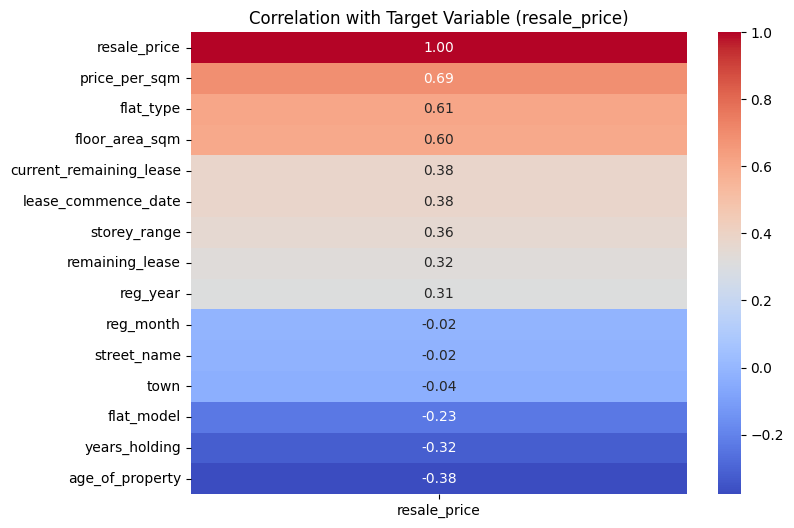

In [49]:
# Select correlation with target variable only and plot heatmap


correlation_matrix = df_selected.corr()
correlation_with_target_only = correlation_matrix['resale_price'].sort_values(ascending=False)

plt.figure(figsize=(8,6))
sns.heatmap(correlation_with_target_only.to_frame(), annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation with Target Variable (resale_price)')
plt.show()

<Axes: title={'center': 'Correlation Matrix'}>

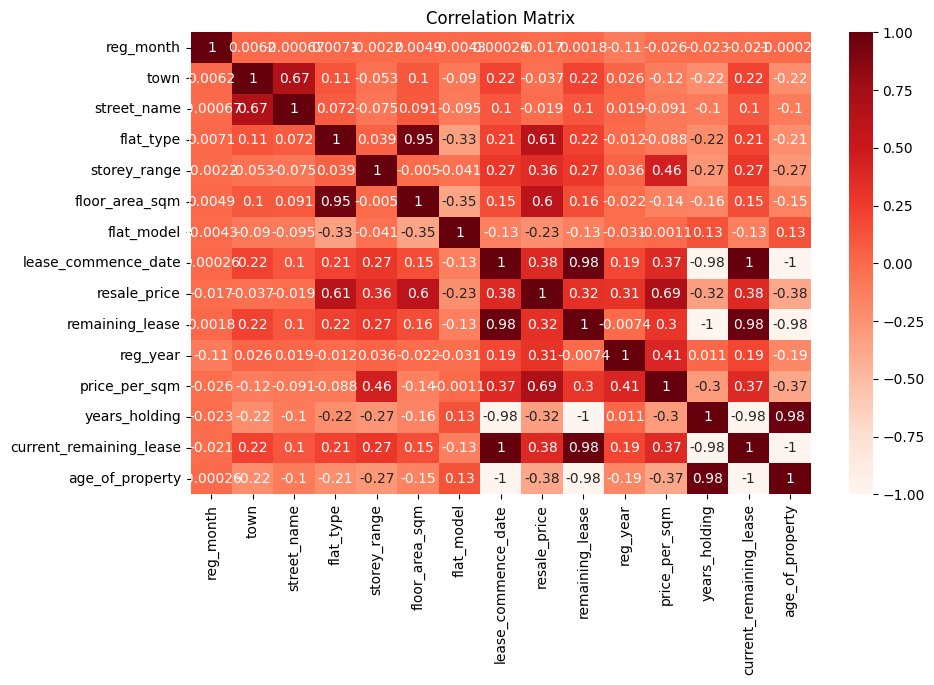

In [50]:
#Check heatmap again for overall df


plt.figure(figsize = (10,6))
plt.title('Correlation Matrix')
sns.heatmap(df_selected.corr(),cmap="Reds", annot = True)

Split the data into training and test data

In [51]:
from sklearn.model_selection import train_test_split

X = df[['town','flat_type','storey_range','floor_area_sqm','flat_model','lease_commence_date','remaining_lease',
        'price_per_sqm','years_holding','current_remaining_lease','age_of_property']]

y = df['resale_price']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

In [52]:

from sklearn.linear_model import LinearRegression

linear_reg_model = LinearRegression()

linear_reg_model.fit(X_train, y_train)

LinearRegression()

In [54]:
import numpy as np

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = linear_reg_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared (coefficient of determination):", r_squared)

Mean Absolute Error: 19007.167968321457
Mean Squared Error: 834147962.3929644
Root Mean Squared Error: 28881.619802098434
R-squared (coefficient of determination): 0.9713091673473266


Random Forest


In [59]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the random forest regressor model
random_forest_model = RandomForestRegressor()

# Train the model on the training data
random_forest_model.fit(X_train, y_train)

RandomForestRegressor()

In [60]:
import numpy as np

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = random_forest_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared (coefficient of determination):", r_squared)

Mean Absolute Error: 315.9231041947565
Mean Squared Error: 4118935.302046625
Root Mean Squared Error: 2029.5160265557463
R-squared (coefficient of determination): 0.9998583276723242


Decision Tree

In [61]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the decision tree regressor model
decision_tree_model = DecisionTreeRegressor()

# Train the model on the training data
decision_tree_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [62]:
# Make predictions on the testing data
y_pred = decision_tree_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared (coefficient of determination):", r_squared)

Mean Absolute Error: 499.66317217114965
Mean Squared Error: 11733489.83885031
Root Mean Squared Error: 3425.41819911822
R-squared (coefficient of determination): 0.9995964222073593


In [64]:
df.columns

Index(['town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'remaining_lease', 'reg_year', 'reg_month', 'address', 'price_per_sqm',
       'years_holding', 'current_remaining_lease', 'age_of_property'],
      dtype='object')

In [65]:
df

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,reg_year,reg_month,address,price_per_sqm,years_holding,current_remaining_lease,age_of_property
0,0.0,2.0,174,16.0,2.0,60.0,5.0,1986,255000.0,70,2015,1,174 ANG MO KIO AVE 4,4250.000000,1.014602,61,38
1,0.0,2.0,541,13.0,0.0,68.0,12.0,1981,275000.0,65,2015,1,541 ANG MO KIO AVE 10,4044.117647,1.017163,56,43
2,0.0,2.0,163,16.0,0.0,69.0,12.0,1980,285000.0,64,2015,1,163 ANG MO KIO AVE 4,4130.434783,1.017677,55,44
3,0.0,2.0,446,13.0,0.0,68.0,12.0,1979,290000.0,63,2015,1,446 ANG MO KIO AVE 10,4264.705882,1.018191,54,45
4,0.0,2.0,557,13.0,2.0,68.0,12.0,1980,290000.0,64,2015,1,557 ANG MO KIO AVE 10,4264.705882,1.017677,55,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183116,25.0,3.0,719,555.0,2.0,84.0,16.0,1987,500000.0,62,2024,7,719 YISHUN ST 71,5952.380952,1.018621,62,37
183117,25.0,4.0,776,536.0,2.0,132.0,5.0,1986,698000.0,61,2024,7,776 YISHUN AVE 2,5287.878788,1.019134,61,38
183118,25.0,4.0,508,538.0,1.0,113.0,5.0,2018,690000.0,92,2024,7,508 YISHUN AVE 4,6106.194690,1.002973,92,6
183119,25.0,4.0,674,538.0,0.0,112.0,5.0,2018,650000.0,93,2024,7,674 YISHUN AVE 4,5803.571429,1.002973,93,6


From the above 3 regressors, we can notice that Random Forest has higher accuracy on R-squared. However since it's simple model, we can take Decision Tree to import the model

In [66]:
import joblib

joblib.dump(decision_tree_model, 'decision_tree_model.pkl')


decision_tree_model = joblib.load('decision_tree_model.pkl')